# Proyecto 11 - Análisis y Clasificación de Clientes


### Título: Análisis y Clasificación de Clientes para Campañas de Marketing

En este proyecto, vas a aplicar técnicas avanzadas de análisis de datos para resolver un problema de clasificación de clientes en un conjunto de datos simulado.

El objetivo es identificar distintos segmentos de clientes basados en sus comportamientos de compra y características demográficas para diseñar campañas de marketing más efectivas.


### Descripción del Proyecto

Este proyecto tiene como objetivo utilizar técnicas de análisis de datos y aprendizaje automático para identificar diferentes segmentos de clientes basados en sus comportamientos de compra y características demográficas. Esto te permitirá desarrollar estrategias de marketing dirigidas y personalizadas. Vas a aplicar métodos de preprocesamiento de datos, reducción de dimensiones, y técnicas de clustering para analizar un conjunto de datos simulado de clientes.


### Datos

Vas a utilizar un dataset simulado llamado `datos_clientes.csv`, que contiene información demográfica y de comportamiento de compra de clientes, como la edad, los ingresos anuales, la puntuación de gasto y la categoría de producto favorito.


### Consigna del Proyecto

1. **Preprocesamiento de Datos**: Cargar, limpiar y preparar el dataset para el análisis. Esto incluye la normalización de los datos para asegurar que las técnicas de reducción de dimensiones y clustering funcionen correctamente.
2. **Reducción de Dimensiones**: Utilizar **PCA** y **SVD** para reducir la cantidad de variables y destacar las características más importantes que influyen en el comportamiento del cliente.
3. **Clustering**: Implementar **K-Means** y **Clustering Jerárquico** para segmentar los clientes en grupos basados en similitudes en sus datos. Esto ayudará a identificar patrones y tendencias entre diferentes tipos de clientes.
4. **Visualización de Datos**: Crear visualizaciones para interpretar los resultados de las técnicas de reducción de dimensiones y clustering. Esto incluye la creación de **gráficos de dispersión** para los resultados de PCA y la visualización de **dendrogramas** para el Clustering Jerárquico.
5. **Interpretación y Estrategias de Marketing**: Analizar los clusters obtenidos y desarrollar propuestas de estrategias de marketing específicas para cada segmento de clientes. Deberás justificar tus estrategias basándote en las características y comportamientos de los grupos identificados.



## Análisis y Clasificación de Clientes para Campañas de Marketing

### 1. Preprocesamiento de Datos

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Cargar los datos
ruta = r"C:\Users\Francisco\customer_data.csv"
data = pd.read_csv(ruta)
data.head()

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100),Categoría de Producto Favorito
0,1,56,89,47,Libros
1,2,69,91,86,Hogar
2,3,46,46,23,Electrónica
3,4,32,28,66,Libros
4,5,60,81,27,Electrónica


In [3]:
# Ver información básica del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ID Cliente                      200 non-null    int64 
 1   Edad                            200 non-null    int64 
 2   Ingresos Anuales (k$)           200 non-null    int64 
 3   Puntuación de Gasto (1-100)     200 non-null    int64 
 4   Categoría de Producto Favorito  200 non-null    object
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Ver la descripción de las estadísticas básicas del dataset
data.describe()

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100)
count,200.000000,200.00000,200.000000,200.000000
mean,100.500000,43.42500,69.580000,49.910000
std,57.879185,14.94191,29.693808,29.409292
min,1.000000,18.00000,20.000000,1.000000
25%,50.750000,31.00000,43.750000,24.000000
50%,100.500000,43.50000,69.500000,50.000000
75%,150.250000,56.00000,92.500000,74.000000
max,200.000000,69.00000,119.000000,99.000000


In [5]:
# Codificar la columna Categoría de Producto Favorito
label_encoder = LabelEncoder()
data['Categoría Numérica'] = label_encoder.fit_transform(data['Categoría de Producto Favorito'])

# Normalizar los datos
escalador = MinMaxScaler()
columnas_a_escalar = ['Edad', 'Ingresos Anuales (k$)', 'Puntuación de Gasto (1-100)', 'Categoría Numérica']
data[columnas_a_escalar] = escalador.fit_transform(data[columnas_a_escalar])

data_escalada = data.drop(['ID Cliente', 'Categoría de Producto Favorito'], axis=1)
data_escalada.head()

,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100),Categoría Numérica
0,0.745098,0.696970,0.469388,0.75
1,1.000000,0.717172,0.867347,0.50
2,0.549020,0.262626,0.224490,0.25
3,0.274510,0.080808,0.663265,0.75
4,0.823529,0.616162,0.265306,0.25


### 2. Reducción de Dimensiones: PCA y SVD

In [6]:
# Aplicar PCA
pca = PCA(n_components=2)
pca_resultados = pca.fit_transform(data_escalada)

In [7]:
# Aplicar SVD
U, sigma, VT = np.linalg.svd(data_escalada)

In [8]:
# Seleccionar los dos primeros componentes singulares para reducción de dimensiones
k = 2
svd_resultados = U[:, :k] * sigma[:k]

### 3. Clustering: K-Means y Clustering Jerárquico

In [9]:
# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_resultados = kmeans.fit_predict(data_escalada)

C:\Users\Francisco\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
# Aplicar Clustering Jerárquico
linked = linkage(data_escalada, 'ward')

### 4. Visualización de Datos

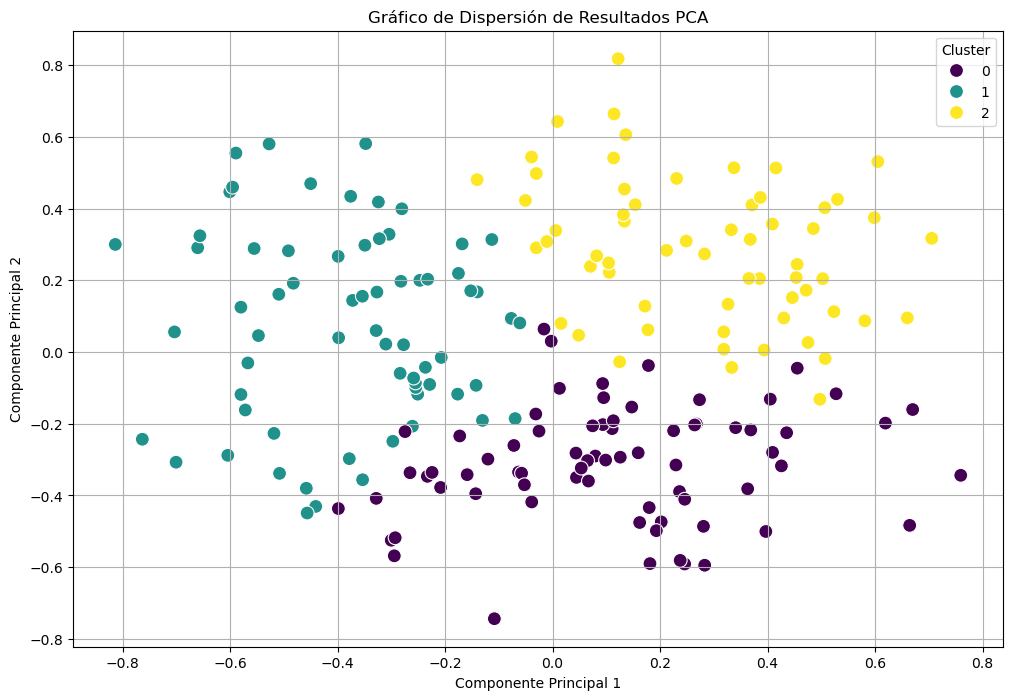

In [11]:
# Crear un gráfico de dispersión para los resultados de PCA

plt.figure(figsize=(12, 8))
sns.scatterplot(x=pca_resultados[:, 0], y=pca_resultados[:, 1], hue=kmeans_resultados, palette='viridis', s=100)
plt.title('Gráfico de Dispersión de Resultados PCA')
plt.legend(title='Cluster')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)

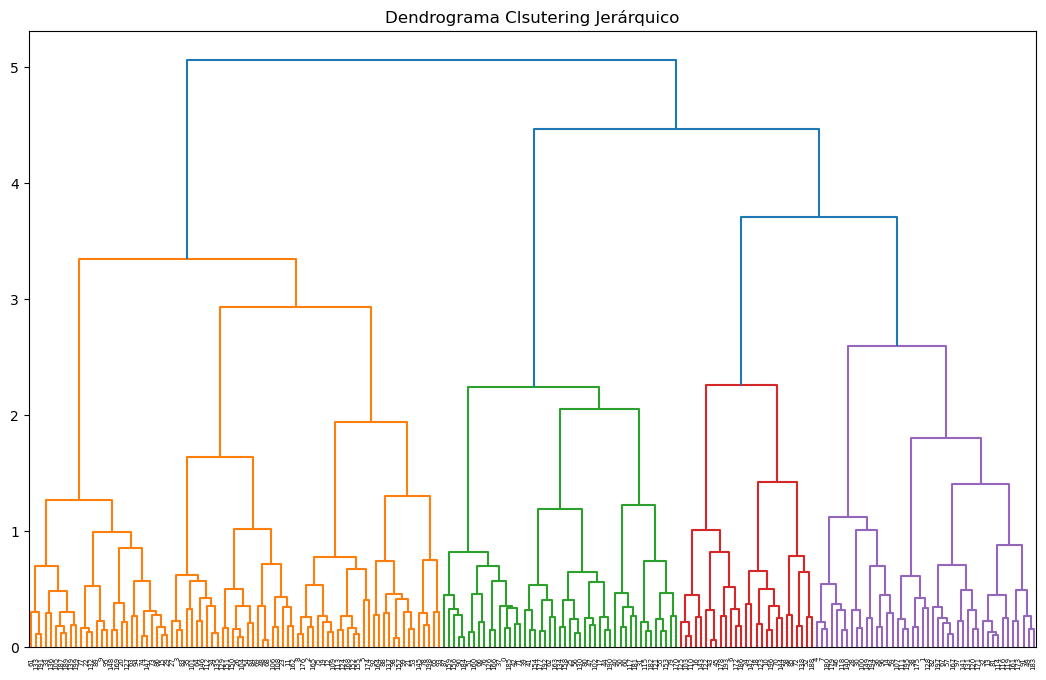

In [12]:
# Crear un dendrograma del clústering jerárquico

plt.figure(figsize=(13, 8))
dendrogram(linked)
plt.title('Dendrograma Clsutering Jerárquico');

### 5. Interpretación y Estrategias de Marketing basadas en los Clusters

In [13]:
# Escribe un loop que te permita mostrar los datos básicos de los diferentes clusters, como:
## su edad media
## sus ingresos medios
## su puntuación de gastos media

In [14]:
# Invertir la normalización para las columnas escaladas
data[columnas_a_escalar] = escalador.inverse_transform(data[columnas_a_escalar])

# Mostrar el DataFrame restaurado
print("\nData restaurada:")
print(data)


Data restaurada:
     ID Cliente  Edad  Ingresos Anuales (k$)  Puntuación de Gasto (1-100)  \
0             1  56.0                   89.0                         47.0   
1             2  69.0                   91.0                         86.0   
2             3  46.0                   46.0                         23.0   
3             4  32.0                   28.0                         66.0   
4             5  60.0                   81.0                         27.0   
..          ...   ...                    ...                          ...   
195         196  69.0                   77.0                         99.0   
196         197  30.0                   86.0                         36.0   
197         198  58.0                   65.0                         82.0   
198         199  20.0                   43.0                         96.0   
199         200  56.0                   51.0                         24.0   

    Categoría de Producto Favorito  Categoría Numérica  


In [18]:
info_clusters = pd.DataFrame({
    'Cluster': kmeans_resultados,
    'Edad': data['Edad'],
    'Ingresos': data['Ingresos Anuales (k$)'],
    'Gasto': data['Puntuación de Gasto (1-100)']
})

# Iterar por cada clúster
for cluster in sorted(info_clusters['Cluster'].unique()):
    
    # Filtrar las filas del clúster actual
    cluster_data = info_clusters[info_clusters['Cluster'] == cluster]
    
    # Calcular propiedades
    edad_media = cluster_data['Edad'].mean()
    ingresos_media = cluster_data['Ingresos'].mean()
    gasto_media = cluster_data['Gasto'].mean()
    
    print(f"Propiedades del Clúster {cluster}:")
    print(f"- Edad promedio: {edad_media:.0f}")
    print(f"- Ingresos promedio: {ingresos_media:.2f}")
    print(f"- Gasto promedio: {gasto_media:.2f}")
    print("-" * 30)

Propiedades del Clúster 0:
- Edad promedio: 41
- Ingresos promedio: 46.90
- Gasto promedio: 25.81
------------------------------
Propiedades del Clúster 1:
- Edad promedio: 39
- Ingresos promedio: 74.52
- Gasto promedio: 73.21
------------------------------
Propiedades del Clúster 2:
- Edad promedio: 51
- Ingresos promedio: 90.92
- Gasto promedio: 52.77
------------------------------


In [16]:
# Redacta una propuesta de estrategia de marketing para los diferentes clusters

Con base en la información proporcionada sobre los clusters, podemos desarrollar estrategias de marketing diferenciadas para cada segmento de clientes. Cada estrategia debe estar orientada a las características particulares y comportamientos de compra observados en cada grupo:

### Estrategias de Marketing para Cada Cluster

#### Cluster 0: Clientes de Edad Media con Ingresos y Gastos Bajos

**Estrategia Propuesta:**
1. **Ofertas y Descuentos:** Este segmento parece ser más sensible al precio debido a sus ingresos más bajos y baja puntuación de gasto. Las campañas promocionales, descuentos y cupones podrían ser efectivos para impulsar las compras.
2. **Marketing de Contenido Educativo:** Proporcionar contenido que eduque sobre la relación costo-beneficio de los productos, ayudando a este grupo a tomar decisiones de compra informadas que maximicen el valor por su dinero.
3. **Programas de Recompensa por Referencias:** Incentivar a los clientes a referir amigos y familiares a cambio de beneficios, lo cual puede ayudar a expandir la base de clientes de manera orgánica y a bajo costo.

#### Cluster 1: Clientes de Edad Media con Ingresos Moderados y Gasto Alto

**Estrategia Propuesta:**
1. **Marketing Digital Intensivo:** Dado que este grupo es relativamente joven y activo en compras, es crucial usar plataformas digitales para el marketing. Redes sociales, publicidad online, y campañas de influencer marketing pueden ser muy efectivas.
2. **Productos y Servicios Innovadores:** Ofrecer productos tecnológicos, de moda, y otros bienes que apelen a un estilo de vida dinámico y moderno.
3. **Experiencias y Eventos Exclusivos:** Organizar eventos o experiencias exclusivas que puedan atraer a este grupo demográfico, como lanzamientos de productos, concursos o meet-ups que les permitan interactuar con la marca de manera significativa.

#### Cluster 2: Clientes Mayores con Altos Ingresos y Gasto Moderado

**Estrategia Propuesta:**
1. **Productos Premium y de Lujo:** Dada la combinación de alta edad e ingresos elevados, este grupo podría estar interesado en productos o servicios de alta calidad y lujo. La oferta podría incluir artículos exclusivos o de edición limitada.
2. **Comunicación Personalizada y Directa:** Considerar el uso de medios tradicionales (como correo postal personalizado o llamadas telefónicas) combinados con estrategias digitales como emails personalizados. El enfoque debe ser sofisticado y directo, respetando su madurez y experiencia de compra.
3. **Programas de Fidelidad:** Crear o mejorar los programas de fidelidad que ofrecen beneficios exclusivos, descuentos en productos premium, y servicios especiales como entregas prioritarias o acceso anticipado a nuevos productos.


Estas estrategias no solo buscan aumentar las ventas, sino también mejorar la satisfacción y fidelización del cliente, creando una conexión más profunda y duradera con la marca.